In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from src.data_loader import read_data

train_data = read_data('train')
val_data = read_data('val')
test_data = read_data('test')

100%|██████████| 200/200 [00:00<00:00, 4387.35it/s]


In [3]:
import clip.clip as clip 

CLIP_MODEL,  clip_img_processor =clip.load('ViT-B/32', jit=False)

In [4]:
from src.config import BATCH_SIZE
import random 
import numpy as np 
import torch 

from src.networks.CLIP_distilBERT_unfreeze import CLIP_dBERT_unfreezed_layers_dataset

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
g = torch.Generator()
g.manual_seed(0)

def get_dataloader(data):
    dataset = CLIP_dBERT_unfreezed_layers_dataset(data, clip_img_processor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,shuffle=True, worker_init_fn=seed_worker, generator=g)
    return data_loader
    
train_loader = get_dataloader(train_data)
val_loader = get_dataloader(val_data)
test_loader = get_dataloader(test_data)

CLIP preprocessing: 100%|██████████| 200/200 [00:02<00:00, 66.75it/s]


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Unfreezing - transformer.layer.5.attention.q_lin.weight
Unfreezing - transformer.layer.5.attention.q_lin.bias
Unfreezing - transformer.layer.5.attention.k_lin.weight
Unfreezing - transformer.layer.5.attention.k_lin.bias
Unfreezing - transformer.layer.5.attention.v_lin.weight
Unfreezing - transformer.layer.5.attention.v_lin.bias
Unfreezing - transformer.layer.5.attention.out_lin.weight
Unfreezing - transformer.layer.5.attention.out_lin.bias
Unfreezing - transformer.layer.5.sa_layer_norm.weight
Unfreezing - transformer.layer.5.sa_layer_norm.bias
Unfreezing - transformer.layer.5.ffn.lin1.weight
Unfreezing - transformer.layer.5.ffn.lin1.bias
Unfreezing - transformer.layer.5.ffn.lin2.weight
Unfreezing - transformer.layer.5.ffn.lin2.bias
Unfreezing - transformer.layer.5.output_layer_norm.weight
Unfreezing - transformer.layer.5.output_layer_norm.bias


100%|██████████| 2/2 [00:01<00:00,  1.18it/s]




For epoch = 0
Training Loss = 0.7037024227055636 | Training Accuracy = 0.008901515151515152
Validation Loss = 0.5169223546981812|Validation Accuracy = 0.04788306451612903




100%|██████████| 2/2 [00:01<00:00,  1.12it/s]




For epoch = 1
Training Loss = 0.5032585114240646 | Training Accuracy = 0.14791666666666667
Validation Loss = 0.3903760462999344|Validation Accuracy = 0.12600806451612903




100%|██████████| 2/2 [00:01<00:00,  1.07it/s]




For epoch = 2
Training Loss = 0.39029788022691553 | Training Accuracy = 0.21647727272727274
Validation Loss = 0.2903204709291458|Validation Accuracy = 0.1592741935483871




100%|██████████| 2/2 [00:01<00:00,  1.04it/s]




For epoch = 3
Training Loss = 0.34717211533676495 | Training Accuracy = 0.21789772727272727
Validation Loss = 0.29692356288433075|Validation Accuracy = 0.1436491935483871




100%|██████████| 2/2 [00:01<00:00,  1.05it/s]




For epoch = 4
Training Loss = 0.34104789793491364 | Training Accuracy = 0.23778409090909092
Validation Loss = 0.3772846609354019|Validation Accuracy = 0.09576612903225806




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 5
Training Loss = 0.35518966344269837 | Training Accuracy = 0.23087121212121212
Validation Loss = 0.31339262425899506|Validation Accuracy = 0.06350806451612903




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 6
Training Loss = 0.37568538839166815 | Training Accuracy = 0.23229166666666667
Validation Loss = 0.30272552371025085|Validation Accuracy = 0.09526209677419355




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 7
Training Loss = 0.3792835663665425 | Training Accuracy = 0.259280303030303
Validation Loss = 0.40437400341033936|Validation Accuracy = 0.12701612903225806




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 8
Training Loss = 0.40722676434300165 | Training Accuracy = 0.25767045454545456
Validation Loss = 0.32959896326065063|Validation Accuracy = 0.12651209677419356




100%|██████████| 2/2 [00:01<00:00,  1.00it/s]




For epoch = 9
Training Loss = 0.4241237003694881 | Training Accuracy = 0.2434659090909091
Validation Loss = 0.30173714458942413|Validation Accuracy = 0.11189516129032258




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 10
Training Loss = 0.4282746518200094 | Training Accuracy = 0.23456439393939393
Validation Loss = 0.45673592388629913|Validation Accuracy = 0.11139112903225806




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 11
Training Loss = 0.4392150735313242 | Training Accuracy = 0.24488636363636365
Validation Loss = 0.3627733737230301|Validation Accuracy = 0.09375




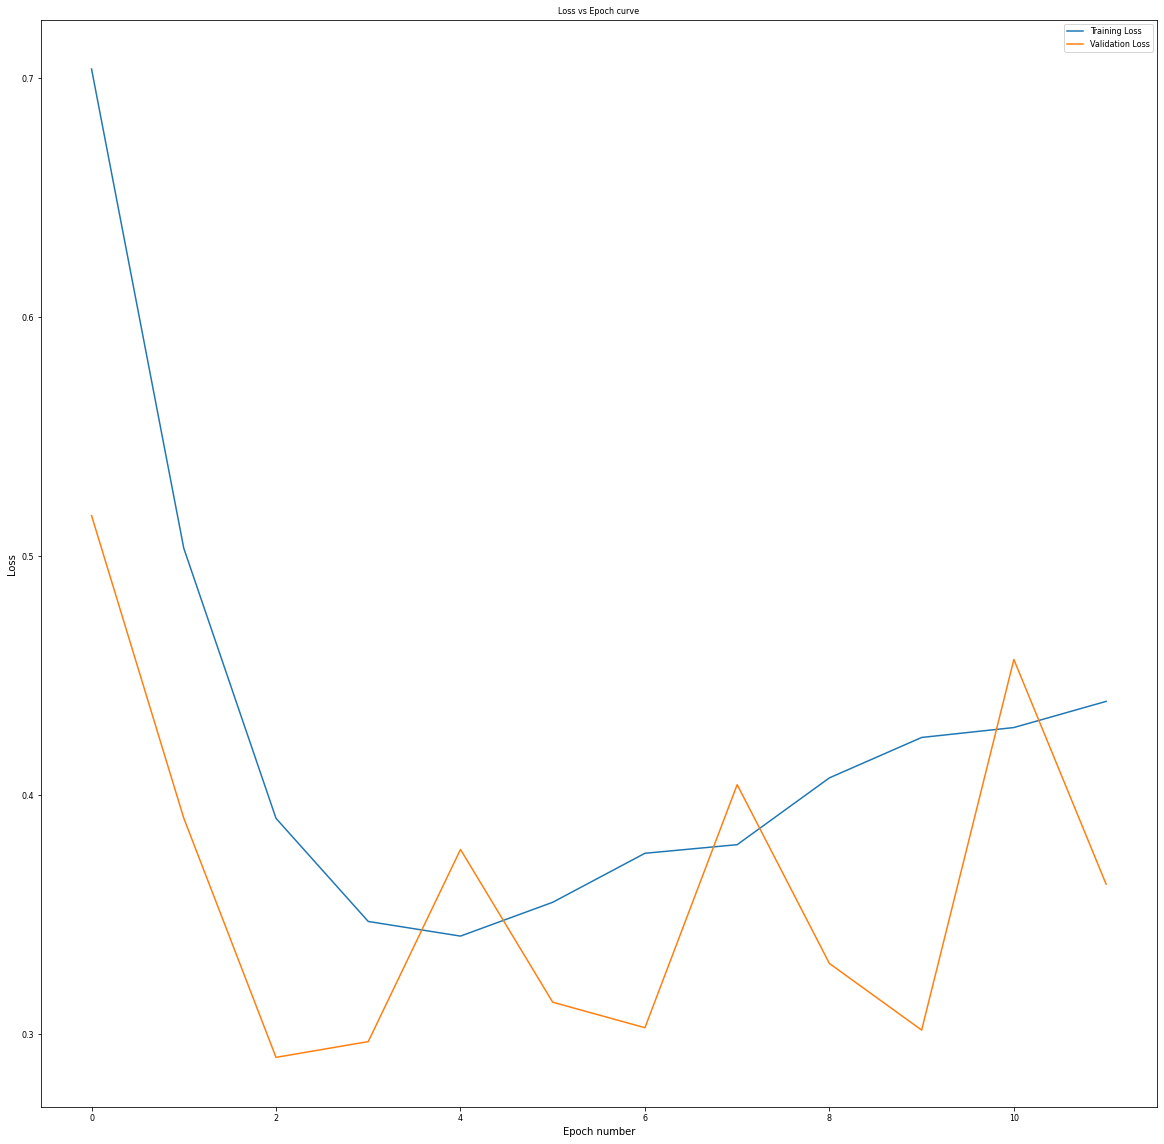

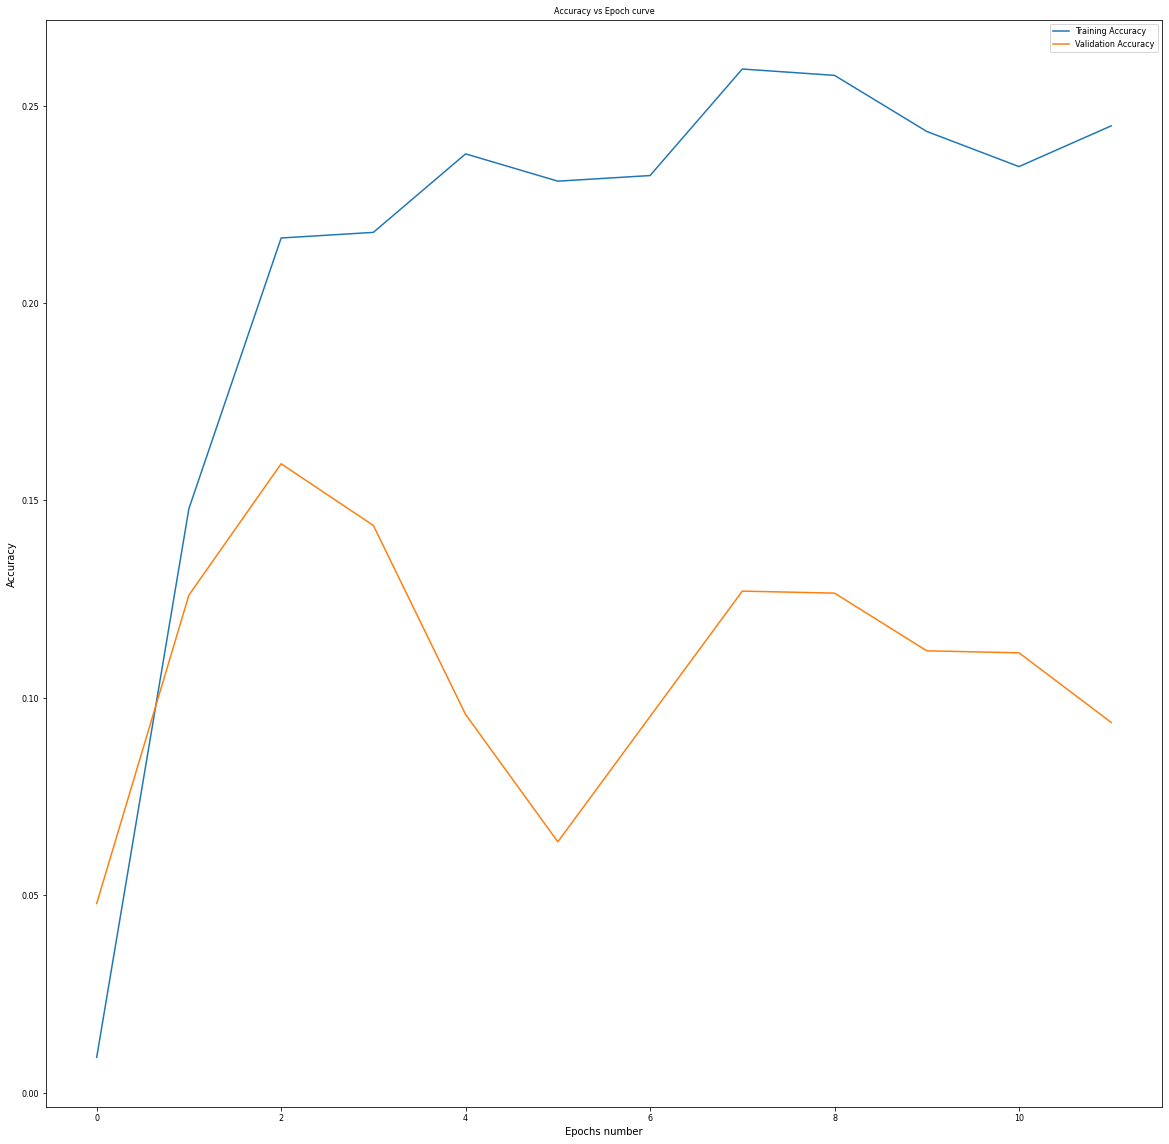

In [5]:
from src.trainer import Trainer
from src.networks.CLIP_distilBERT_unfreeze import CLIP_dBERT_unfreezed_layers_Input_transformer, CLIP_dBERT_unfreezed_layers_Model
import torch.nn as nn
import torch 

trainer = Trainer(12)

#Set data
trainer.set_data(train_loader, val_loader)

#set model 
model = CLIP_dBERT_unfreezed_layers_Model(CLIP_MODEL).cuda()
input_transformer = CLIP_dBERT_unfreezed_layers_Input_transformer()
trainer.set_model(model, input_transformer)

#Backpropagation
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
trainer.set_optimizer(optimizer, loss_fn)
trainer.train(l2_r=1e-3)
trainer.plot()

In [6]:
trainer.test(test_loader)

100%|██████████| 22/22 [00:20<00:00,  1.06it/s]

Accuracy Score = 30.27656477438137
Macro F1 score Score = 17.13845384392968
Micro F1 score Score = 69.82444518052336


In [7]:
torch.save(model.state_dict(), f"Models/CLIP_distilBERT_unfreeze.model")
